<a href="https://colab.research.google.com/github/varthini-30/tasksgenai/blob/main/Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/gurupatil0003/Waste-Mangement-Dataset

Cloning into 'Waste-Mangement-Dataset'...
remote: Enumerating objects: 2558, done.
remote: Counting objects: 100% (2558/2558), done.
remote: Compressing objects: 100% (2557/2557), done.
remote: Total 2558 (delta 4), reused 2543 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (2558/2558), 40.85 MiB | 28.53 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
tr_Data = '/content/Waste-Mangement-Dataset/Data/Train'
te_Data = '/content/Waste-Mangement-Dataset/Data/Test'
size,batch,epochs,lr=224,64,10,3e-4

In [ ]:
import torch, timm
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
d= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
T = transforms.Compose([transforms.Resize((size, size)), transforms.ToTensor(),transforms .Normalize([0.5]*3,[0.5*3])])

In [ ]:
train =datasets.ImageFolder(tr_Data, transform=T)
test = datasets.ImageFolder(te_Data, transform=T)
tr=DataLoader(train, batch_size=batch, pin_memory=True,shuffle=True)
te=DataLoader(test, batch_size=batch, shuffle=True)
names=train.classes
names

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
model = timm.create_model("vit_tiny_patch16_224",pretrained=True, num_classes=6)
model.head = nn.Linear(model.head.in_features, len(names))
model.to(d)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (norm): Identity()
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)


In [ ]:
g_opt = torch.optim.AdamW(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()
for _ in range(epochs):
  model.train()
  for x, y in tr:
    x, y = x.to(d), y.to(d)
    g_opt.zero_grad()
    loss_fn(model(x),y).backward()
    g_opt.step()
  print(_,end="")

0123456789

paper


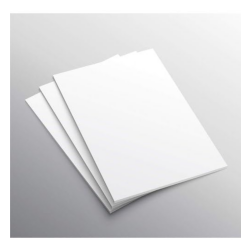

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('/content/paper.jpg')
inp = T(img).unsqueeze(0).to(d)
print(names[model(inp).argmax().item()])
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis('off')
plt.show()
